In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.00, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city =citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
        

597

In [7]:
# mport the datetime module from the datetime library
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data
city_data=[]
#print the beginning of the logging.
print('Beginning Data Retrieval    ')
print('----------------------------')

# Create counters
record_count =1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 ==0 and i >= 50):
        set_count+=1
        record_count = 1
    # Create endpoint  URL with each city.
    city_url = url +'&q=' + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | vasyurinskaya
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | muyezerskiy
Processing Record 7 of Set 1 | shadrinsk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | araouane
Processing Record 10 of Set 1 | abu dhabi
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | curanilahue
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | baracoa
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | bonavista
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | miranorte
City not found. Skipping...
Processing Record 20 of Set 1 

Processing Record 34 of Set 4 | iquique
Processing Record 35 of Set 4 | cidreira
Processing Record 36 of Set 4 | tabarqah
City not found. Skipping...
Processing Record 37 of Set 4 | skotterud
Processing Record 38 of Set 4 | ust-tsilma
Processing Record 39 of Set 4 | lyubech
Processing Record 40 of Set 4 | nejapa
Processing Record 41 of Set 4 | niono
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | gamba
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | eenhana
Processing Record 46 of Set 4 | teofilo otoni
Processing Record 47 of Set 4 | dzidzantun
Processing Record 48 of Set 4 | sarahan
Processing Record 49 of Set 4 | bajil
Processing Record 50 of Set 4 | umm jarr
City not found. Skipping...
Processing Record 1 of Set 5 | corrente
Processing Record 2 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 3 of Set 5 | olavarria
Processing Record 4 of Set 5 | igarka
Processing Record 5 of Set 5 | campoverde
Processing

City not found. Skipping...
Processing Record 28 of Set 8 | paradwip
City not found. Skipping...
Processing Record 29 of Set 8 | totness
Processing Record 30 of Set 8 | iskateley
Processing Record 31 of Set 8 | saint combs
City not found. Skipping...
Processing Record 32 of Set 8 | gurgan
City not found. Skipping...
Processing Record 33 of Set 8 | ugoofaaru
Processing Record 34 of Set 8 | filadelfia
Processing Record 35 of Set 8 | mocambique
City not found. Skipping...
Processing Record 36 of Set 8 | la rioja
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | olhao
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | areosa
Processing Record 41 of Set 8 | kegayli
City not found. Skipping...
Processing Record 42 of Set 8 | maltahohe
Processing Record 43 of Set 8 | krasnovishersk
Processing Record 44 of Set 8 | pudozh
Processing Record 45 of Set 8 | cabedelo
Processing Record 46 of Set 8 | taraza
Processing Record 47 of Set 8 | lebyazhye
Proces

Processing Record 14 of Set 12 | danielskuil
Processing Record 15 of Set 12 | benghazi
Processing Record 16 of Set 12 | walvis bay
Processing Record 17 of Set 12 | logrono
Processing Record 18 of Set 12 | fort-shevchenko
Processing Record 19 of Set 12 | kuytun
Processing Record 20 of Set 12 | palmas bellas
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | nouakchott
Processing Record 23 of Set 12 | sitrah
Processing Record 24 of Set 12 | raga
Processing Record 25 of Set 12 | navalgund
Processing Record 26 of Set 12 | sovetsk
Processing Record 27 of Set 12 | ampanihy
Processing Record 28 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 29 of Set 12 | yarmouth
Processing Record 30 of Set 12 | male
Processing Record 31 of Set 12 | itamaraju
Processing Record 32 of Set 12 | anori
Processing Record 33 of Set 12 | bilma
Processing Record 34 of Set 12 | lagunas
Processing Record 35 of Set 12 | zabol
Processing Record 36 of Set 12 | lisakovsk
Process

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,61,0,4.61,CL,2021-10-28 00:44:50
1,Qaanaaq,77.4840,-69.3632,20.93,95,100,10.25,GL,2021-10-28 00:44:51
2,Vasyurinskaya,45.1181,39.4240,31.89,69,0,4.29,RU,2021-10-28 00:44:51
3,Carnarvon,-24.8667,113.6333,68.07,40,98,14.97,AU,2021-10-28 00:44:51
4,Muyezerskiy,63.9333,31.6500,29.77,96,100,7.14,RU,2021-10-28 00:44:52


In [10]:
new_column_order =['City','Country','Date', 'Lat','Lng','Max Temp', 'Humidity','Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-28 00:44:50,-53.1500,-70.9167,48.31,61,0,4.61
1,Qaanaaq,GL,2021-10-28 00:44:51,77.4840,-69.3632,20.93,95,100,10.25
2,Vasyurinskaya,RU,2021-10-28 00:44:51,45.1181,39.4240,31.89,69,0,4.29
3,Carnarvon,AU,2021-10-28 00:44:51,-24.8667,113.6333,68.07,40,98,14.97
4,Muyezerskiy,RU,2021-10-28 00:44:52,63.9333,31.6500,29.77,96,100,7.14


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

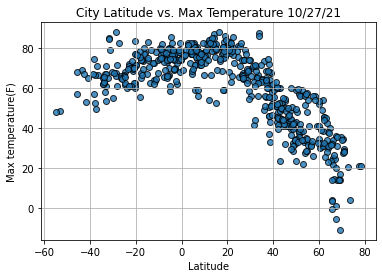

In [36]:
# Import time Module
import time

#Build the scatter plot for latitued vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig1.png')          

# Show plot.
plt.show()

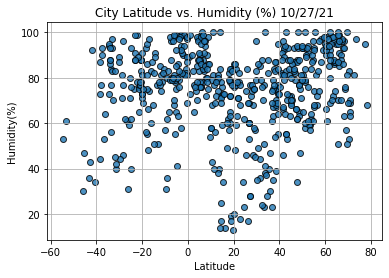

In [37]:
#Build the scatter plot for latitued vs. humiditiy
plt.scatter(lats,
            humidity,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')          

# Show plot.
plt.show()

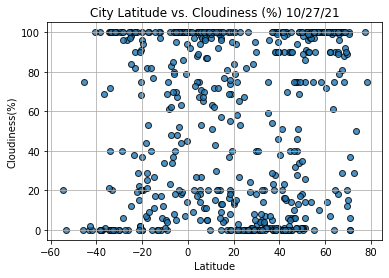

In [15]:
#Build the scatter plot for latitued vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig3.png')          

# Show plot.
plt.show()

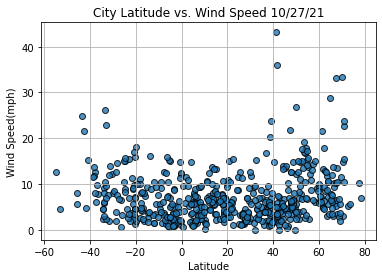

In [16]:
#Build the scatter plot for latitued vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig4.png')          

# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Creat a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title (title)
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Bonavista
Country                        CA
Date          2021-10-28 00:44:54
Lat                       48.6499
Lng                      -53.1147
Max Temp                    40.12
Humidity                       65
Cloudiness                    100
Wind Speed                  14.81
Name: 13, dtype: object

In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

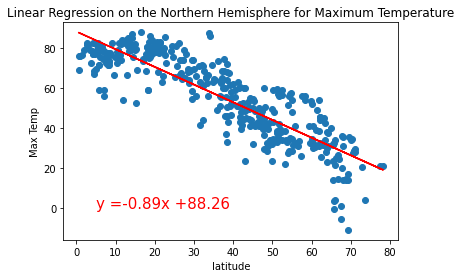

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (5,0))

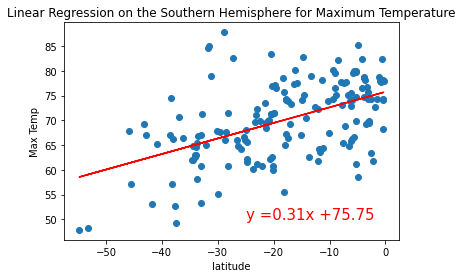

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-25,50))

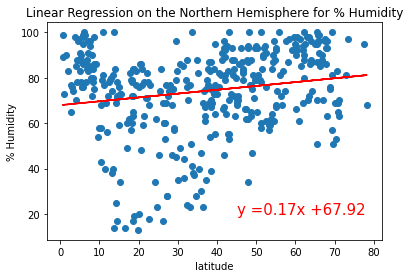

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (45,20))

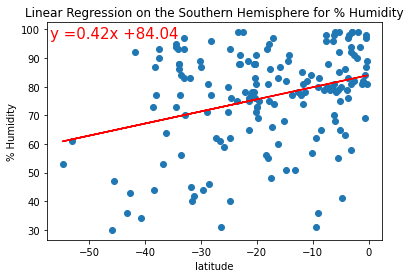

In [75]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-57,97))

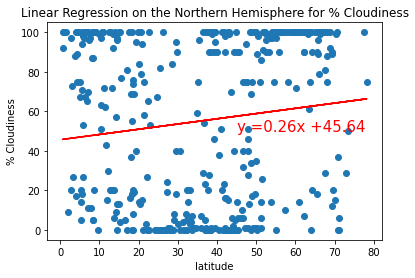

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (45,50))

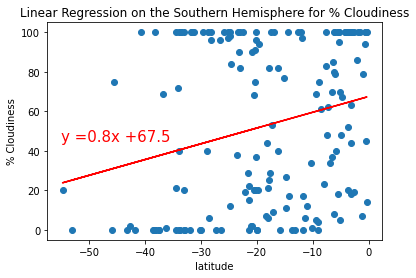

In [83]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-55,45))

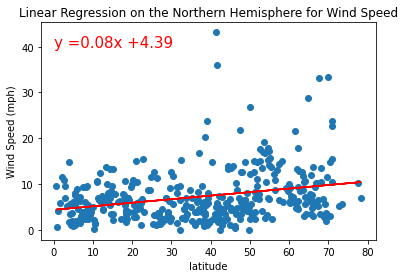

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (0,40))

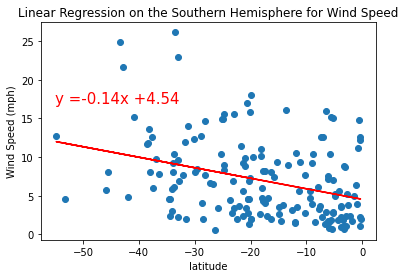

In [87]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-55,17))